# Dati Geospaziali

La estenzione del file d'analizzare è *gpkg*, ciò significa che il set di dati è disponibile come file GeoPackage, un formato specializzato per memorizzare dati vettoriali geospaziali, e tale file può essere letto dal paccheto  *GeoPandas*, utilizzando la *funzione geopandas.read_file()*.
Perciò, si devi iniziare con l'importazione del pacchetto geopandas o, ancora prima, con l'installazione se questa non è stato installato

In [1]:
!pip install geopandas fiona shapely

import geopandas as gpd

In [2]:
input_file = "/Users/roberthramon/Desktop/Appunti/Project_Python/RurAll/RurAll/resa_girasole_2022.gpkg"
data = gpd.read_file(input_file)

In [3]:
print(data)

                  Data/Ora  Longitudin  Latitudine  RESAKG  VELOCITA     AREA  \
0     5 set 2022, 10:08:09  11,9758245  44,8474908  1870.0      4.80  140.000   
1     5 set 2022, 10:08:24  11,9758157  44,8476751  1270.0      4.83  140.875   
2     5 set 2022, 10:08:40  11,9758154  44,8478795  1420.0      4.78  139.417   
3     5 set 2022, 10:08:55  11,9758209  44,8480593  2010.0      4.85  141.458   
4     5 set 2022, 10:09:10  11,9758201  44,8482443  1320.0      4.80  140.000   
...                    ...         ...         ...     ...       ...      ...   
1957  3 set 2022, 20:13:03  11,9757431  44,8480422  2260.0      4.77  139.125   
1958  3 set 2022, 20:13:19  11,9757395  44,8482399  2460.0      4.78  139.417   
1959  3 set 2022, 20:13:34  11,9757408  44,8484282  2330.0      4.78  139.417   
1960  3 set 2022, 20:13:49  11,9757414   44,848618  1950.0      4.99  145.542   
1961  3 set 2022, 20:14:05  11,9757344  44,8488297  1810.0      5.44  158.667   

      UMIDITA              

# 




# Data Preparation con EDA

EDI è un processo (insieme di azioni) per la manipolazione e preparazione di un dataset.

Con EDA si fanno operazione sui dati sia per pulizia, se c'è bisogno, sia per acquiestare consapoveloza dei dati che stiamo elaborando, de manera grafica o statistica.

### 1. Importazione delle librerie necessarie per EDI

In [4]:
import pandas as pd                     
import matplotlib.pyplot as plt  
import seaborn as sns 
%matplotlib inline
sns.set(color_codes=True)

### 2. Verifica di coerenza fra testa e coda del dataset.

   E' una verifica per essere sicuri, sopratutto, che i dati della coda non abbiano dati mancanti o dati caricati erroneamente.

In [5]:
data.head(5)

,Data/Ora,Longitudin,Latitudine,RESAKG,VELOCITA,AREA,UMIDITA,geometry
0,"5 set 2022, 10:08:09","11,9758245","44,8474908",1870.0,4.80,140.000,NaN,POINT (1333142.685 5597543.903)
1,"5 set 2022, 10:08:24","11,9758157","44,8476751",1270.0,4.83,140.875,NaN,POINT (1333141.706 5597572.841)
2,"5 set 2022, 10:08:40","11,9758154","44,8478795",1420.0,4.78,139.417,NaN,POINT (1333141.672 5597604.934)
3,"5 set 2022, 10:08:55","11,9758209","44,8480593",2010.0,4.85,141.458,33.1,POINT (1333142.284 5597633.165)
4,"5 set 2022, 10:09:10","11,9758201","44,8482443",1320.0,4.80,140.000,33.1,POINT (1333142.195 5597662.213)


In [6]:
data.tail(5)

,Data/Ora,Longitudin,Latitudine,RESAKG,VELOCITA,AREA,UMIDITA,geometry
1957,"3 set 2022, 20:13:03","11,9757431","44,8480422",2260.0,4.77,139.125,30.8,POINT (1333133.624 5597630.480)
1958,"3 set 2022, 20:13:19","11,9757395","44,8482399",2460.0,4.78,139.417,24.6,POINT (1333133.223 5597661.522)
1959,"3 set 2022, 20:13:34","11,9757408","44,8484282",2330.0,4.78,139.417,24.6,POINT (1333133.368 5597691.088)
1960,"3 set 2022, 20:13:49","11,9757414","44,848618",1950.0,4.99,145.542,24.6,POINT (1333133.435 5597720.889)
1961,"3 set 2022, 20:14:05","11,9757344","44,8488297",1810.0,5.44,158.667,24.6,POINT (1333132.655 5597754.129)


Possiamo osservare che i dati iniziali e finali del dataset sono coerenti.

### 3. Verifica del tipo di dato delle colonne, vallori null e la classe del nostro dataset.

In [7]:
data.info() 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1962 entries, 0 to 1961
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Data/Ora    1962 non-null   object  
 1   Longitudin  1962 non-null   object  
 2   Latitudine  1962 non-null   object  
 3   RESAKG      1962 non-null   float64 
 4   VELOCITA    1962 non-null   float64 
 5   AREA        1962 non-null   float64 
 6   UMIDITA     1925 non-null   float64 
 7   geometry    1962 non-null   geometry
dtypes: float64(4), geometry(1), object(3)
memory usage: 122.8+ KB


L'informazione che si può strarre dell'intero dataframe è:

- La classe del *dataframe* è di tipo *GeoDataFrame* (type(data)), cioè, contiene dati tabellari e geospaziali. Questo mi permette di avere a dispozione attributi e funzioni per lavorare con i dati geospazili, tali come: 

    • l'attributo *geometry* che restituisce i dati della colonna con l'*infomazione geometrica*.
    
    • alcuni medoti extra per lavorare con i dati spazioli, tali come *area, longitudine, distanza*.


- Il *numero totale di osservazioni*(righe) sono 1962 e 8 caratteristiche(colonne).

- La variabile *UMIDITA* ha 37 valori null, da valutare se cancellare quelle righe o valorizzarli con la media.

- La variabile *geometry* e di tipo geometry e nello specifico è un *punto* (vedasi data.head(5))



### 4. Per verificare il tipo di Sistema di riferimento di coordinate (CRS) si usa l'attributo CRS

In [8]:
data.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Possiamo osservare che l'EPSG è 3857 (EPSG:3857 è in metri - 2D proiezione) ma le colonne Longitudin e Latitudine sono scritte in gradi, per tanto, l'EPSG dovrebbe essere 4326 (EPSG:4326 è in gradi - 3D sfere).

Per trasformare il tipo dell'EPSG useremo l'attributo to_crs, assegnado tutto l'intero dataframe ad un'altra variabile, in questo caso, data_transf.


In [9]:
data_transf=data.to_crs(epsg=4326)

In [10]:
data_transf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

5. Valutazione dei campi null e possibili outliers

In [11]:
print(data_transf.isnull().sum())

Data/Ora       0
Longitudin     0
Latitudine     0
RESAKG         0
VELOCITA       0
AREA           0
UMIDITA       37
geometry       0
dtype: int64


Come era apparso, precedentemente, la caratteristica UMIDITA è l'unica che ha valori null.
Siccome sono poche le righe che hanno il valore null decido di cancellarli con la funzione *dropna*.

In [12]:
data_transf = data_transf.dropna() 
data_transf.count()

Data/Ora      1925
Longitudin    1925
Latitudine    1925
RESAKG        1925
VELOCITA      1925
AREA          1925
UMIDITA       1925
geometry      1925
dtype: int64

Di seguito verifichiamo la esistenza di possibili outlier tramite la grafica boxplot.

Verrano analizate le singole variabili 

<Axes: xlabel='RESAKG'>

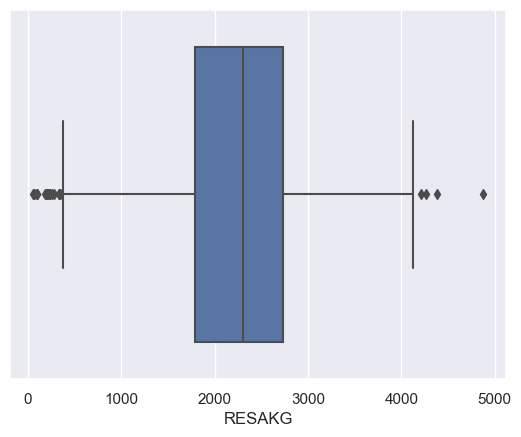

In [13]:
sns.boxplot(x=data_transf['RESAKG'])

<Axes: xlabel='VELOCITA'>

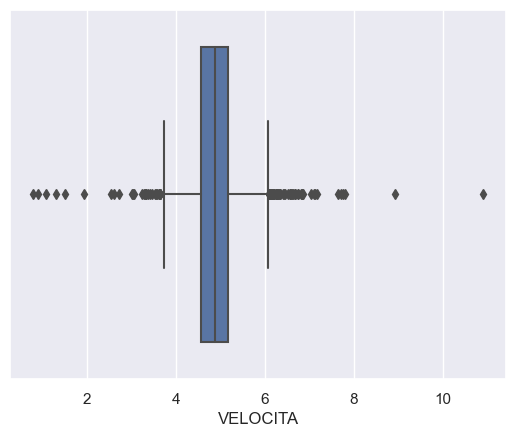

In [14]:
sns.boxplot(x=data_transf['VELOCITA'])

<Axes: xlabel='AREA'>

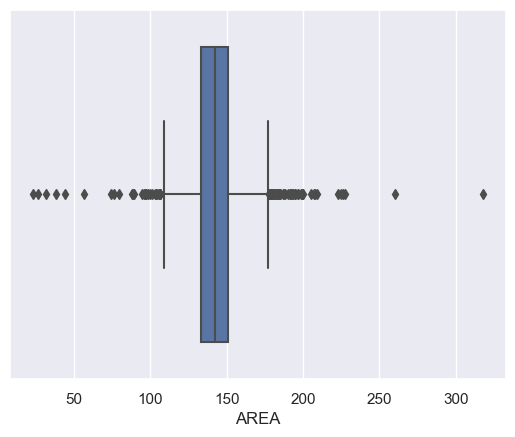

In [15]:
sns.boxplot(x=data_transf['AREA'])

<Axes: xlabel='UMIDITA'>

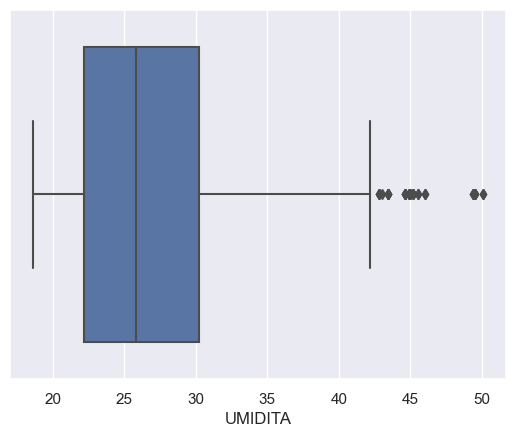

In [16]:
sns.boxplot(x=data_transf['UMIDITA'])

Senza un esperto di dominio, i dati sembrano coerenti; non si allontanano tropo dalla media e quelli che si allontanano della media, come l'umedità o velocità, sembrano dati entro i valori attesi.

6. Verifica visuale dei dati

<Axes: >

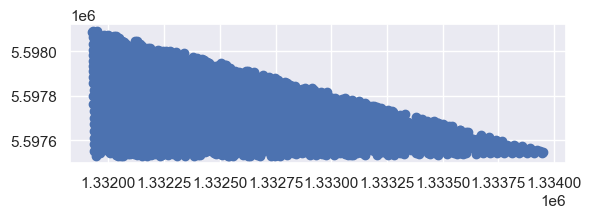

In [17]:
data.plot()

In [18]:
data_transf.plot(edgecolor='k', facecolor='red', figsize=(20, 10))

<Axes: >

Le grafiche dei GeoDataFrame *data* e *data_transf* sono relativamente diverse, gli assi, di quest'ultima fanno referenza alle colonne Longitudin e Latitudine e in *data* gli assi vengono valorizzati con i la dati della colona geometry.

7. Statistiche di riepilogo

In [19]:
print(data_transf.describe())

            RESAKG     VELOCITA         AREA      UMIDITA
count  1925.000000  1925.000000  1925.000000  1925.000000
mean   2254.374026     4.900068   142.918646    27.022805
std     701.198325     0.617205    18.001814     6.154021
min      50.000000     0.780000    22.750000    18.600000
25%    1790.000000     4.570000   133.292000    22.200000
50%    2300.000000     4.890000   142.625000    25.800000
75%    2730.000000     5.170000   150.792000    30.200000
max    4880.000000    10.910000   318.208000    50.100000


La resa media del mese di settembre del 2022 è stata 2254.37kg, dove i macchinari giravano a una velocita media di 4km/h.

# 

# Modeling

1. Importazione delle librerie necessarie per la creazione del modello

In [20]:
import geopandas as gpd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

2. Carica i dati dal file utilizzando GeoPandas.

   In questo caso il file è stato caricato precedentemente.

   data = gpd.read_file('dati.gpkg')

3. Creazione dei dataframe X e y per il modello.

   X ha le colonne di input (features) e y la colonna target (valore da predirre). 

In [21]:
X = data_transf[['VELOCITA', 'AREA', 'UMIDITA']]
y = data_transf['RESAKG'] 

4. Divisione dei dati in set di addestramento (X_train, y_train) e di test (X_test, y_train) con la funzione train_test_split della libreria sklearnd.

   test_size uguale a 0.2 vuol dire che il 20% delle occorrenze delle righe dell'intero dataset verrà usato per il test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

5. Definizione (RandomForestRegressor) e addestramento (fit) del modello

   Ho deciso di creare il modello di machine learning con RandomForestRegressor, che ha la capità di risolvere problemi di regressione o classificazione. Questa decisione l'ho pressa perchè ho variabili con unità di misura diverse. Il modello RandomForestRegressor crea un insieme di alberi decisionali, noti come "Random Forest", che hanno la capacità di produrre una previsione combinando le previsioni di ciascun albero, la previsione finale è la media (o la mediana) delle previsioni di tutti gli alberi.


In [23]:
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

6. Verifica dell'adattamento dei dati al modello.
   Questa verifica si effetua con i dati di test tramitie la funzione score

In [24]:
score = model.score(X_test, y_test)
print(score)

0.20327615097648233


Il valore dello score è approssimatamente di 0.20 che vuol dire che il modello non si adatta bene ai nostri dati, ciò suggerisce che il modello non è in grado di fare previsioni accurate sul dataset fornito.

Siccome il modello non ha ottenuto un buon punteggio, è necessario prendere in considerazione la raccolta di più dati; valutare che le caratteristiche di input non sono correlate con l'output desiderato; la regolazione dei parametri del modello non è l'adecuata o valutare l'utilizzo di un modello completamente diverso.

7. Valutazione del modello
   
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred,multioutput='raw_values')
    
    print("Errore quadratico medio del modello:", mse)
    
    
  Questo step non è più necessario perché si deve valutare l'implementazione di un altro modello

# 

## Modello 2

Il rusultato non cambia riguardo al modello 1 

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Valutazione del modello
y_pred = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Errore quadratico medio del modello:", mse)

Errore quadratico medio del modello: 390957.87465561205
